In [42]:
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

In [43]:
"""
Load the training data.
"""
TRAINING_DATA_PATH = "./data/train.csv"
def load_training_data(training_data_path=TRAINING_DATA_PATH):
    return pd.read_csv(training_data_path)

raw_training_data = load_training_data()
training_data = raw_training_data.drop("label", axis=1)
training_data_labels = raw_training_data["label"].copy()

C:\Users\arman\AppData\Local\Temp/ipykernel_8680/992380415.py:8: DtypeWarning: Columns (15,16,17) have mixed types.Specify dtype option on import or set low_memory=False.
  raw_training_data = load_training_data()


In [44]:
"""
Sanitize Data
"""
# Print all columns that are non-numeric types
nan_training_data = training_data.select_dtypes(exclude=[np.number])
print("The following are non-numeric columns: ")
for col in nan_training_data.columns:
    print("\t"+ col)

# We know that 'protocol_type', 'service', and 'flag' are simply string
# labels, so we map those to integer values first using scikit's OrdinalEncoder.
ordinal_encoder = OrdinalEncoder()

training_data['protocol_type_code'] = ordinal_encoder.fit_transform(
    training_data[['protocol_type']]
)
training_data['service_code'] = ordinal_encoder.fit_transform(
    training_data[['service']]
)
training_data['flag_code'] = ordinal_encoder.fit_transform(
    training_data[['flag']]
)


The following are non-numeric columns: 
	protocol_type
	service
	flag
	num_root
	num_file_creations
	num_shells


In [45]:
# Now we need to clean up 'num_root', 'num_file_creations', and 'num_shells'.
# We know currently that there are random string entries. To solve this problem,
# we will replace those string with 0.

# print(training_data['num_root'].value_counts())
# print(training_data['num_file_creations'].value_counts())
# print(training_data['num_shells'].value_counts())

training_data['num_root'] = np.where(
    training_data['num_root'] == 'tcp', 0, training_data['num_root']
)
training_data['num_file_creations'] = np.where(
    training_data['num_file_creations'] == 'http', 0, training_data['num_file_creations']
)
training_data['num_shells'] = np.where(
    training_data['num_shells'] == 'SF', 0, training_data['num_shells']
)

# # Now the ultimate test, convert those features to dtype64
training_data[['num_root', 'num_file_creations', 'num_shells']] = training_data[['num_root', 'num_file_creations', 'num_shells']].apply(pd.to_numeric)

In [46]:
# View all datatypes present in dataset
# Three object types still remain ('protocol_type', 'service', 'flag') 
# because we left them there in a previous step.

nan_training_data = training_data.select_dtypes(exclude=[np.number])
print("The following are non-numeric columns: ")
for col in nan_training_data.columns:
    print("\t"+ col)

# training_data.info(show_counts=True)

training_data = training_data.drop(columns=['protocol_type', 'service', 'flag'])

The following are non-numeric columns: 
	protocol_type
	service
	flag


In [47]:
scaler = StandardScaler()
training_data[training_data.columns] = scaler.fit_transform(training_data[training_data.columns])

In [48]:
training_data

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type_code,service_code,flag_code
0,-0.066833,-0.001720,0.068188,-0.002391,-0.015139,-0.001103,-0.026521,-0.004391,2.442794,-0.002097,...,-0.282939,-1.257937,-0.156664,-0.466384,-0.465454,-0.250832,-0.249632,0.941035,-0.088838,0.516555
1,-0.066833,-0.001777,0.005325,-0.002391,-0.015139,-0.001103,-0.026521,-0.004391,2.442794,-0.002097,...,-0.282939,0.821119,-0.156664,-0.466384,-0.465454,-0.250832,-0.249632,0.941035,-0.088838,0.516555
2,-0.066833,-0.001698,0.000208,-0.002391,-0.015139,-0.001103,-0.026521,-0.004391,2.442794,-0.002097,...,-0.282939,-0.218409,-0.156664,-0.466384,-0.465454,-0.250832,-0.249632,0.941035,-0.088838,0.516555
3,-0.066833,-0.001701,0.001455,-0.002391,-0.015139,-0.001103,-0.026521,-0.004391,2.442794,-0.002097,...,-0.282939,-0.571848,-0.156664,-0.466384,-0.465454,-0.250832,-0.249632,0.941035,-0.088838,0.516555
4,-0.066833,-0.001695,-0.000942,-0.002391,-0.015139,-0.001103,-0.026521,-0.004391,2.442794,-0.002097,...,-0.282939,-0.738173,-0.156664,-0.466384,-0.465454,-0.250832,-0.249632,0.941035,-0.088838,0.516555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4898426,-0.066833,-0.001724,0.001852,-0.002391,-0.015139,-0.001103,-0.026521,-0.004391,2.442794,-0.002097,...,-0.282939,-0.571848,1.055098,-0.466384,-0.439288,-0.250832,-0.249632,0.941035,-0.088838,0.516555
4898427,-0.066833,-0.001716,-0.001330,-0.002391,-0.015139,-0.001103,-0.026521,-0.004391,2.442794,-0.002097,...,-0.282939,-0.738173,1.055098,-0.466384,-0.439288,-0.250832,-0.249632,0.941035,-0.088838,0.516555
4898428,-0.066833,-0.001717,0.003901,-0.002391,-0.015139,-0.001103,-0.026521,-0.004391,2.442794,-0.002097,...,-0.282939,-0.842126,1.055098,-0.466384,-0.439288,-0.250832,-0.249632,0.941035,-0.088838,0.516555
4898429,-0.066833,-0.001716,0.000218,-0.002391,-0.015139,-0.001103,-0.026521,-0.004391,2.442794,-0.002097,...,-0.282939,-0.904497,1.055098,-0.466384,-0.439288,-0.250832,-0.249632,0.941035,-0.088838,0.516555


In [49]:
from sklearn.decomposition import PCA

In [50]:
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(training_data)
print(principalComponents)

[[ 1.36006155  0.86390658]
 [ 0.08966842  0.92829622]
 [ 0.36180051  0.95300326]
 ...
 [-0.18387474  1.26889951]
 [-0.17074125  1.26151723]
 [-0.12590877  1.18738246]]


In [51]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
print(principalDf)


finalDf = pd.concat([principalDf, training_data_labels], axis = 1)
print(finalDf)

labels = finalDf.label.unique().tolist()
print(labels)

         principal component 1  principal component 2
0                     1.360062               0.863907
1                     0.089668               0.928296
2                     0.361801               0.953003
3                     0.449550               0.959201
4                     0.488130               0.960689
...                        ...                    ...
4898426              -0.249307               1.274053
4898427              -0.208857               1.269283
4898428              -0.183875               1.268900
4898429              -0.170741               1.261517
4898430              -0.125909               1.187382

[4898431 rows x 2 columns]
         principal component 1  principal component 2   label
0                     1.360062               0.863907  normal
1                     0.089668               0.928296  normal
2                     0.361801               0.953003  normal
3                     0.449550               0.959201  normal
4             

C:\Users\arman\miniconda3\envs\snowflakes\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


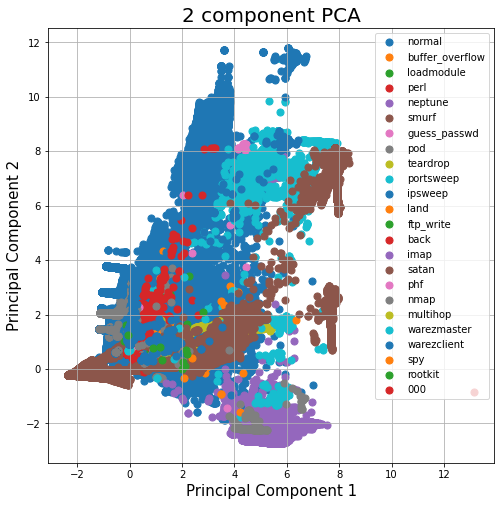

In [52]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = labels

for target in targets:
    indicesToKeep = finalDf['label'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(training_data, training_data_labels)
svm_clf.predict(training_data.iloc[[5]])